1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

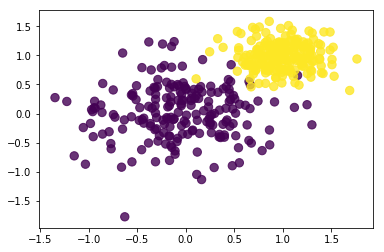

In [43]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

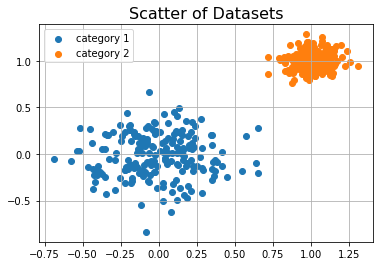

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the function that creates two Gaussian functions given the mean and the standard deviation
def generate(mean1, std1, mean2, std2):
    cat1 = std1*np.random.randn(2,200) + mean1
    cat2 = std2*np.random.randn(2,200) + mean2
    return cat1, cat2

mean1 = 0
std1 = 0.25
mean2 = 1
std2 = 0.1
cat1, cat2 = generate(mean1, std1, mean2, std2)

# Plot
plt.scatter(cat1[0],cat1[1])
plt.scatter(cat2[0],cat2[1])
plt.legend(['category 1','category 2'])
plt.title("Scatter of Datasets", size=16)
plt.grid()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

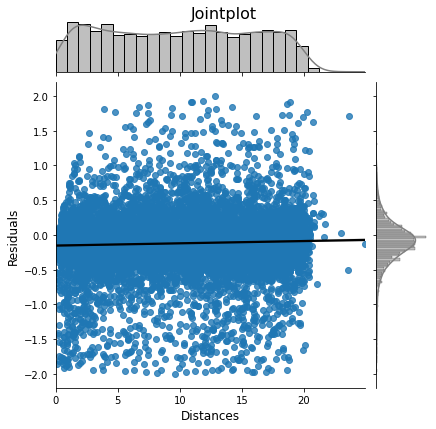

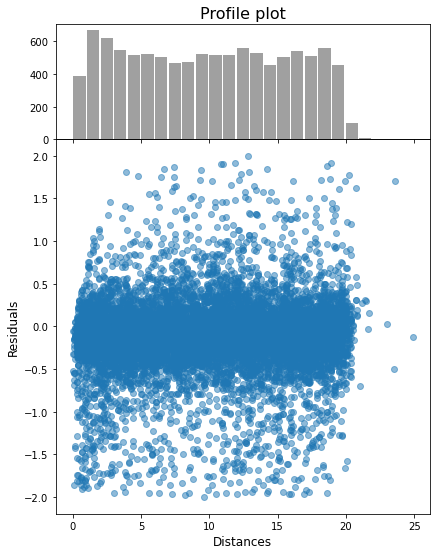

In [45]:
import pickle
import pandas as pd
import seaborn as sns

#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

filename = "data/residuals_261.pkl"
data = pd.read_pickle(filename)
my_dict = dict(data.item())

# Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
df = pd.DataFrame(my_dict, columns = ['residuals','distances'])
df = df.where(abs(df['residuals']) < 2).dropna()

# Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
j = sns.jointplot(data = df, x="distances", y="residuals",kind="reg", marginal_kws={'color': 'grey'}, line_kws={'color': 'black'})
j.ax_joint.set_xlabel("Distances", size=12)
j.ax_joint.set_ylabel("Residuals", size=12)
j.fig.suptitle("Jointplot", size=16)
j.fig.subplots_adjust(top=0.95)

# COMMENT ON THE CORRELATION BETWEEN THESE VARIABLES.
# As we can see in the scatter plot, residuals are denser close to the straight line representing 
# the linear regression. Hence, the scatter plot shows how distance measurements differ from the linear regression.
# Indeed, in general, residuals contain the information about error of the fitting used for the data. 

# Definition of the figure
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
fig = plt.figure(figsize=(8, 8))

# Main scatter plot
ax = fig.add_axes(rect_scatter)
plt.xlabel('Distances', size = 12)
plt.ylabel('Residuals', size = 12)

# Profile histogram for "distances"
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax.scatter(df['distances'], df['residuals'], marker = 'o', alpha = 0.5)
h = ax_histx.hist(df['distances'], bins=25, alpha=0.75, color='grey', rwidth=0.9)
plt.title('Profile plot', size = 16)

# Array of bin centers of the profile histogram of the "distance" variable
x = np.array(h[1])

# Mean values of the "residuals", estimated in slices (bins) of "distance"
y = np.zeros(len(x))

# Standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
y_err = np.zeros(len(x))

for i in range(len(x)-1):
    y[i] = df['residuals'][(df['distances']>x[i]) & (df['distances']<=x[i+1]) ].mean()
    y_err[i] = df['residuals'][(df['distances']>x[i]) & (df['distances']<=x[i+1]) ].std()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


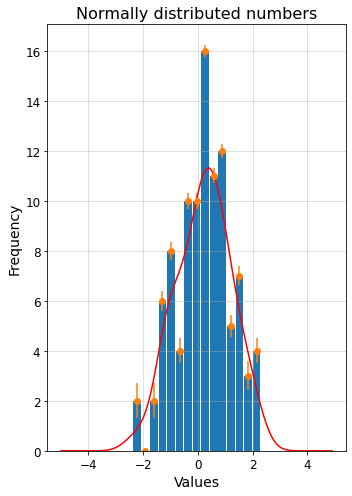

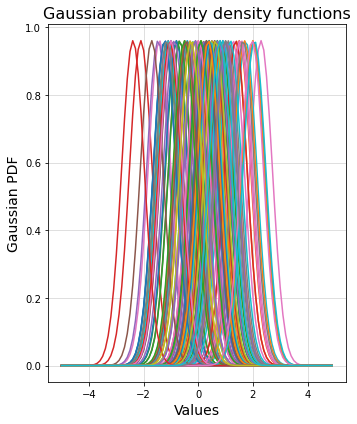

In [46]:
# Fill a numpy array x of length N = 100 with a variable normally distributed
# with a given mean and standard deviation
x = np.random.normal(0, 1, 100)

fig, ax = plt.subplots(tight_layout=True, figsize = (5,7))

h = ax.hist(x, bins=15, rwidth=0.9) # bins = 15 -> use a meaningful number of bins
ax.set_ylabel("Frequency", size = 14) # set a proper y axis label
ax.set_xlabel("Values", size = 14)
ax.set_title("Normally distributed numbers", size = 16)

# Set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
ax.grid(alpha=0.5)

# Display the histograms as data points with errors (the error being the poisson uncertainty)
bin_counts = h[0] # It contains the histogram values
bin_edges = h[1] # It contains the histogram edges

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2 # It computes the bin centers

# Poissonian errors
y_error = np.zeros(len(bin_counts))
for i in range(len(y_error)):
    if bin_counts[i] == 0:
        y_error[i] = 0
    else: 
        y_error[i] = 1/pow(bin_counts[i],0.5)
        
plt.errorbar(x=bin_centers, y=bin_counts, yerr=y_error, fmt='o')


from scipy.stats import norm
from scipy.integrate import trapz 

fig1, ax1 = plt.subplots(tight_layout=True, figsize = (5,6))
x_values = np.arange(-5, 5, 0.1)
gaussian_pdf = []
for i in range(len(x)):
    mean = x[i]
    standard_deviation = 1.06*np.std(x)*x.size**(-1/5)
    
    # Gaussian with the mean equal to the value of x[i] and std equal to the equation provided to the text
    y_values = norm.pdf(x_values,mean, standard_deviation)
    
    # Store the Gaussian function
    gaussian_pdf.append(y_values)
    
    # Plot
    plt.plot(x_values,y_values)
    
ax1.set_ylabel("Gaussian PDF", size = 14) # set a proper y axis label
ax1.set_xlabel("Values", size = 14)
ax1.set_title("Gaussian probability density functions", size = 16)
ax1.grid(alpha=0.5)

gaussian_pdf = np.array(gaussian_pdf) # Convert the list containing all Gaussian functions to a matrix
sum_pdf = np.sum(gaussian_pdf, axis=0) # Sum of all Gaussian functions

integral = trapz(sum_pdf, x_values) # It computes the area of the sum of the Gaussians

# Area histogram = sum of all rectangles
area_hist = 0
for i in range(len(bin_counts)-1):
    area_hist += bin_counts[i]*(bin_edges[i+1]-bin_edges[i])

# Scale factor
scale_factor = integral/area_hist

# Normalization of the Gaussian function
sum_pdf = sum_pdf/scale_factor

ax.plot(x_values,sum_pdf,color="red")
plt.show()